# Preprocessing Data

## Repairing Missing Data

In [1]:
import numpy as np

NaN = np.nan

In [2]:
import pandas as pd

# Create a dataframe
data = pd.DataFrame([[1, 2, NaN], [NaN, 2, NaN],
                     [3, NaN, NaN], [NaN, 3, 8],
                     [5, 3, NaN]], columns=['A', 'B', 'C'])

data

,A,B,C
0,1.0,2.0,NaN
1,NaN,2.0,NaN
2,3.0,NaN,NaN
3,NaN,3.0,8.0
4,5.0,3.0,NaN


Check for NaN values and count them for each feature:

In [3]:
series = data.isnull().sum(axis=0)

series

A    2
B    1
C    4
dtype: int64

https://www.askpython.com/python/examples/nan-in-numpy-and-pandas

Replacing NaN values

```py
s.fillna(0)
```

In [4]:
# Drop C from the dataset
data.drop('C', axis=1, inplace=True)

# Create a placeholder for B's missing values
data['missing_B'] = data['B'].isnull().astype(int)

# Fill missings in B using B's average
data['B'].fillna(data['B'].mean(), inplace=True)

# Interpolate A
data['A'].interpolate(method='linear', inplace=True)

data

,A,B,missing_B
0,1.0,2.0,0
1,2.0,2.0,0
2,3.0,2.5,1
3,4.0,3.0,0
4,5.0,3.0,0


We replicate data and missing value handling as before, but for feature B:

In [5]:
data = pd.DataFrame([[1, 2, NaN], [NaN, 2, NaN],
                     [3, NaN, NaN], [NaN, 3, 8],
                     [5, 3, NaN]], columns=['A', 'B', 'C'])

data.drop('C', axis=1, inplace=True)

data['missing_B'] = data['B'].isnull().astype(int)

data['A'].interpolate(method='linear', inplace=True)

# Here we handle feature B using a mode instead of an average
data['B'].fillna(data['B'].mode().iloc[0], inplace=True)

data

,A,B,missing_B
0,1.0,2.0,0
1,2.0,2.0,0
2,3.0,2.0,1
3,4.0,3.0,0
4,5.0,3.0,0


# Boston Dataset

### Description of all features

[Linear Regression on Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

```
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s
```

## Compressing Data

In [6]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.datasets import load_boston
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np

# Load the Boston House Prices dataset from scikit-learn
boston = load_boston()
X, y = boston.data, boston.target
pca = PCA().fit(X)

type(pca)


sklearn.decomposition._pca.PCA

In [7]:
print(' '.join(['%5i' % (k + 1) for k in range(13)]))

print(' '.join(['-----'] * 13))

print(' '.join(["%0.3f" % (variance) for variance
                in pca.explained_variance_ratio_]))

print(' '.join(["%0.3f" % (variance) for variance
                in np.cumsum(pca.explained_variance_ratio_)]))


    1     2     3     4     5     6     7     8     9    10    11    12    13
----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- -----
0.806 0.163 0.021 0.007 0.001 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000
0.806 0.969 0.990 0.997 0.998 0.999 1.000 1.000 1.000 1.000 1.000 1.000 1.000


## Identifying and setting boundaries for unusual or outlying data

<AxesSubplot:>

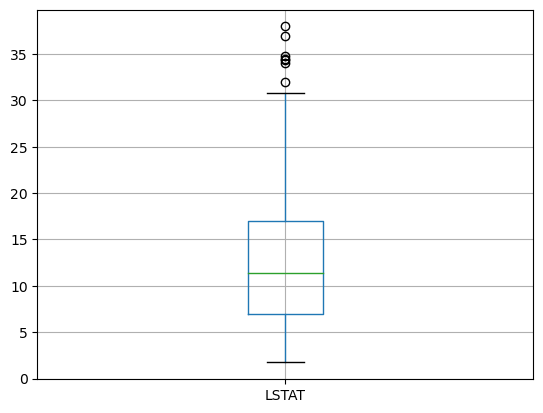

In [8]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target
X = pd.DataFrame(X, columns=boston.feature_names)
X.boxplot('LSTAT', return_type='axes')


![](13a.png)

## Matplotlib boxplot

[Highlighting outliers](https://subscription.packtpub.com/book/data/9781789806311/1/ch01lvl1sec10/highlighting-outliers)

In [9]:
# Retain three of its variables in a dataframe
boston1 = pd.DataFrame(boston.data, columns=boston.feature_names)[['RM', 'LSTAT', 'CRIM']]

print(boston1.shape)
boston1.head(7)

(506, 3)


,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
5,6.430,5.21,0.02985
6,6.012,12.43,0.08829


Make a boxplot for the RM variable:

Text(0.5, 1.0, 'Boxplot')

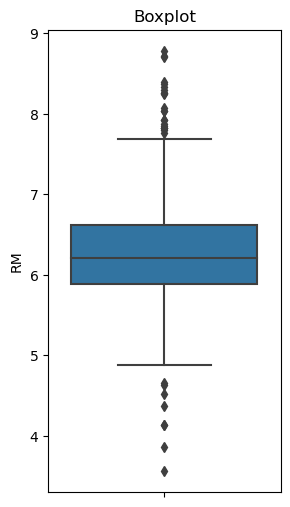

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(3, 6))  # change the final size of the plot
sns.boxplot(y=boston1['RM'])
plt.title('Boxplot')

## Continuing with "Delimiting Anomalous Data"...

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()
pca.fit(scale(X))
C = pca.transform(scale(X))

type(C)

numpy.ndarray

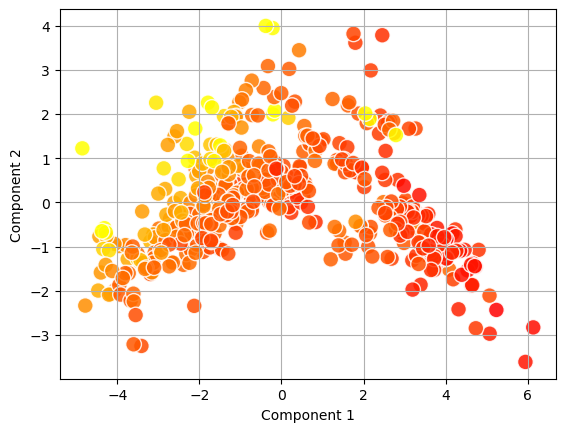

In [13]:
import matplotlib.pyplot as plt

# NOTE: If you're missing "c" (which are the y values), your "autumn" will be "blue".
plt.scatter(C[:, 0], C[:, 1], s=2 ** 7, c=y, edgecolors='white', alpha=0.85, cmap='autumn')

plt.grid()  # adds a grid
plt.xlabel('Component 1')  # adds label to x axis
plt.ylabel('Component 2')  # adds label to y axis

plt.show()

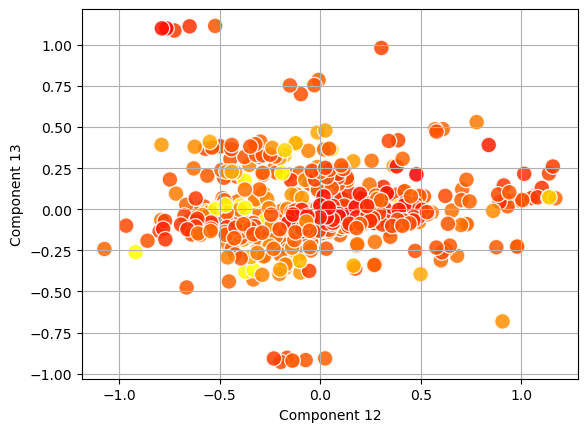

In [14]:
plt.scatter(C[:, 11], C[:, 12], s=2 ** 7, c=y, 
            edgecolors='white', alpha=0.85, cmap='autumn')

plt.grid()  # adds a grid

plt.xlabel('Component 12')  # adds label to x axis
plt.ylabel('Component 13')  # adds label to y axis

plt.show()
